<a href="https://colab.research.google.com/github/kalamgit/lecture0/blob/master/imageproc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DataDir.zip to DataDir.zip


In [3]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['DataDir.zip']), 'r')
data.extractall()

In [4]:
data.printdir()

File Name                                             Modified             Size
DataDir/test/                                  2022-07-16 09:51:08            0
DataDir/test/1.jpeg                            2022-07-15 10:04:48       195397
DataDir/test/10.jpeg                           2022-07-15 10:03:30       147957
DataDir/test/11.jpeg                           2022-07-16 09:26:56       604818
DataDir/test/12.jpeg                           2022-07-16 09:26:54       628145
DataDir/test/13.jpeg                           2022-06-21 17:22:08       147977
DataDir/test/14.jpeg                           2022-07-15 20:52:26        71580
DataDir/test/15.jpeg                           2022-07-15 20:52:30        63332
DataDir/test/2.jpeg                            2022-07-15 10:04:28       175461
DataDir/test/3.jpeg                            2022-07-15 10:03:24       215800
DataDir/test/4.jpeg                            2022-07-15 10:04:12       117524
DataDir/test/5.jpeg                     

In [5]:
train_data_dir = 'DataDir/train'  
validation_data_dir = 'DataDir/validation'  
test_data_dir = 'DataDir/test'

In [6]:
target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]

In [7]:
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])
nb_validation_samples = sum([len(files) for _, _, files in os.walk(validation_data_dir)])
nb_test_samples = sum([len(files) for _, _, files in os.walk(test_data_dir)])
total_nb_samples = nb_train_samples + nb_validation_samples + nb_test_samples

nb_classes = len(target_names)      # number of output classes

print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples, '\n - # of validation samples: ', nb_validation_samples,
      '\n - # of test samples: ', nb_test_samples,
       '\n - total # of samples: ', total_nb_samples, '\n - train ratio:', round(nb_train_samples/total_nb_samples*100, 2),
      '\n - validation ratio:', round(nb_validation_samples/total_nb_samples*100, 2),
      '\n - test ratio:', round(nb_test_samples/total_nb_samples*100, 2))

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['sleeping', 'not_sleeping'] 
 - # of classes:  2
 - # of trained samples:  22 
 - # of validation samples:  22 
 - # of test samples:  15 
 - total # of samples:  59 
 - train ratio: 37.29 
 - validation ratio: 37.29 
 - test ratio: 25.42


In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset = train.flow_from_directory('DataDir/train',
                                          target_size=(200, 200),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory('DataDir/validation',
                                          target_size=(200, 200),
                                          batch_size=3,
                                          class_mode='binary')

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'not_sleeping': 0, 'sleeping': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
from keras import models, layers

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=2,
                      epochs=30,
                      validation_data=validation_dataset)

Epoch 1/30
2/2 [==============================] - 4s 2s/step - loss: 0.3692 - accuracy: 0.6667 - val_loss: 8.5481 - val_accuracy: 0.7273
Epoch 2/30
2/2 [==============================] - 2s 2s/step - loss: 5.1671e-14 - accuracy: 1.0000 - val_loss: 8.5481 - val_accuracy: 0.7273
Epoch 3/30
2/2 [==============================] - 2s 2s/step - loss: 8.2303 - accuracy: 0.5000 - val_loss: 2.4687 - val_accuracy: 0.7273
Epoch 4/30
2/2 [==============================] - 3s 2s/step - loss: 3.2440 - accuracy: 0.5000 - val_loss: 1.1468 - val_accuracy: 0.2727
Epoch 5/30
2/2 [==============================] - 2s 2s/step - loss: 0.3358 - accuracy: 0.8333 - val_loss: 1.0110 - val_accuracy: 0.7273
Epoch 6/30
2/2 [==============================] - 2s 2s/step - loss: 0.7018 - accuracy: 0.8333 - val_loss: 0.5495 - val_accuracy: 0.7727
Epoch 7/30
2/2 [==============================] - 2s 1s/step - loss: 0.5347 - accuracy: 0.5000 - val_loss: 1.2355 - val_accuracy: 0.2727
Epoch 8/30
2/2 [=====================

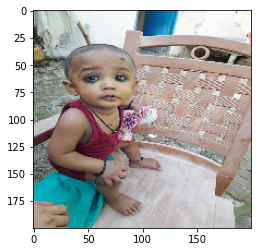

Umar is not sleeping


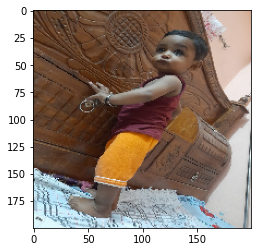

Umar is not sleeping


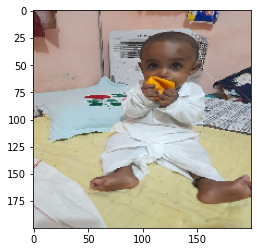

Umar is not sleeping


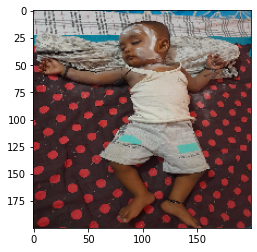

Umar is sleeping


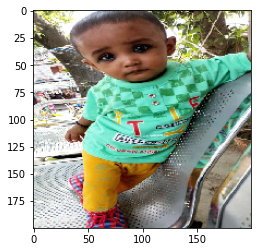

Umar is not sleeping


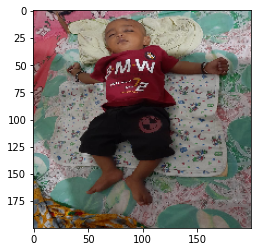

Umar is sleeping


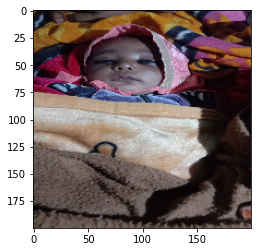

Umar is sleeping


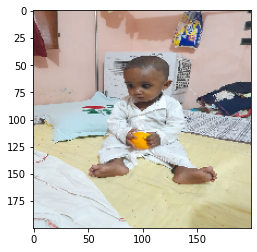

Umar is not sleeping


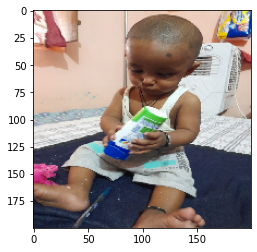

Umar is not sleeping


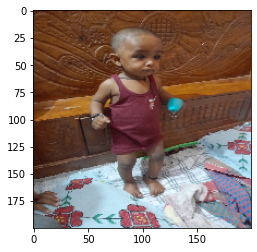

Umar is not sleeping


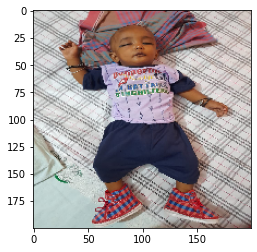

Umar is not sleeping


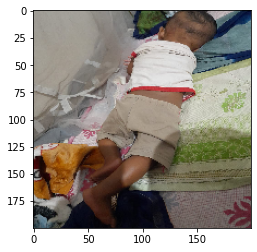

Umar is not sleeping


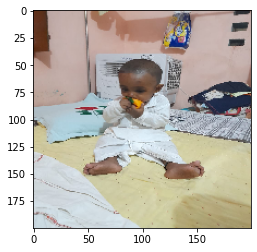

Umar is not sleeping


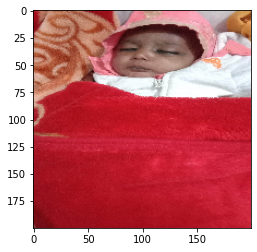

Umar is sleeping


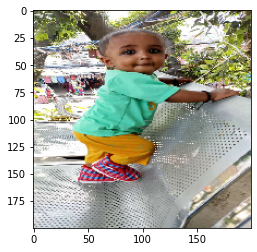

Umar is not sleeping


In [16]:
dir_path = 'DataDir/test'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200, 200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("Umar is not sleeping")
  else:
    print("Umar is sleeping")